In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
from itertools import cycle
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
# hyperparameter tuning ## To search for the most suitable parameters for the Decision Tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from yellowbrick import ROCAUC
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import confusion_matrix
import pydotplus
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans, splitting_type
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES


# Data Preparation

In [2]:
X_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/4-5Modulo/Dataset/X_train.txt", header=None,  delim_whitespace=True)
y_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/4-5Modulo/Dataset/y_train.txt", header=None, delim_whitespace=True )
X_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/4-5Modulo/Dataset/X_test.txt", header=None, delim_whitespace=True )
y_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/4-5Modulo/Dataset/y_test.txt", header=None, delim_whitespace=True )
subject_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/4-5Modulo/Dataset/subject_test.txt", header=None, delim_whitespace=True )
subject_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/4-5Modulo/Dataset/subject_train.txt", header=None, delim_whitespace=True )
features = pd.read_csv("/Users/salvu/Desktop/DM2Git/4-5Modulo/Dataset/features.txt", header=None, delim_whitespace=True )

In [3]:
feature = features
feature.drop(0,inplace=True, axis=1)

In [4]:
#inseriamo l'intestazione al dataset
lista=[]
feat_transpa = feature.transpose()
for i in range(561):
    lista.append(feat_transpa.iloc[0][i])
X_test.columns=lista    
X_train.columns=lista

In [5]:
# eliminiamo le colonne che contengono la stima mad in quanto quasi uguale a dev.std

stringa="mad()"
for col in X_train.columns:
    if(stringa in col):
        X_train.drop(labels=col, axis=1, inplace=True)
for col in X_test.columns:
    if(stringa in col):
        X_test.drop(labels=col, axis=1, inplace=True)
#for col in features:
#    if (stringa in col):
#        features.drop(labels=col,axis=1,inplace=True)

# ADVANCED CLUSTERING

In [6]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

## Gaussian Mixture

In [7]:
from sklearn.mixture import GaussianMixture

In [9]:
gm1 = GaussianMixture(n_components=10, random_state=0, covariance_type='full', n_init=5)
gm1.fit(X_train)

y_pred_gm1 = gm1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_gm1))
print('F1-score %s' % f1_score(y_test, y_pred_gm1, average=None))

Accuracy 0.11401425178147269
F1-score [0.         0.01190476 0.01654846 0.         0.         0.53839802
 0.         0.         0.        ]


In [10]:
gm1.means_

array([[ 0.27405866, -0.00818375, -0.10265172, ..., -0.75359821,
         0.1259304 , -0.00490559],
       [ 0.27679841, -0.01875537, -0.11023226, ..., -0.73286901,
         0.24531313,  0.09417443],
       [ 0.2913971 , -0.01792412, -0.10815993, ..., -0.78477712,
         0.208333  ,  0.04218504],
       ...,
       [ 0.27054352, -0.01984266, -0.10865268, ...,  0.51329437,
        -0.38837391, -0.4379642 ],
       [ 0.25993149, -0.02333324, -0.11373572, ..., -0.67105148,
         0.23652604,  0.06677251],
       [ 0.26275774, -0.02437773, -0.11393856, ..., -0.55249741,
         0.27899914,  0.2455036 ]])

In [11]:
gm1.covariances_

array([[[ 3.53741937e-03, -1.08244134e-03, -1.05469423e-03, ...,
         -1.23827410e-03,  1.95512879e-03,  2.16160801e-03],
        [-1.08244134e-03,  2.20194412e-03,  1.91291804e-03, ...,
          8.71907964e-04, -7.03686981e-04, -8.08299747e-04],
        [-1.05469423e-03,  1.91291804e-03,  5.46457160e-03, ...,
          5.91974543e-04,  1.35737228e-04,  1.92538231e-04],
        ...,
        [-1.23827410e-03,  8.71907964e-04,  5.91974543e-04, ...,
          2.34087224e-02, -5.56555282e-03, -8.06907256e-05],
        [ 1.95512879e-03, -7.03686981e-04,  1.35737228e-04, ...,
         -5.56555282e-03,  1.83683738e-02,  1.08009052e-02],
        [ 2.16160801e-03, -8.08299747e-04,  1.92538231e-04, ...,
         -8.06907256e-05,  1.08009052e-02,  2.05120229e-02]],

       [[ 3.61631027e-03, -3.79247810e-06,  2.01350934e-04, ...,
         -3.73042380e-04, -6.84259184e-05, -5.00033674e-04],
        [-3.79247810e-06,  6.41472996e-04,  3.31589583e-04, ...,
         -9.33169144e-05, -8.98527157e

In [12]:
gm1.precisions_

array([[[ 9.90346112e+03, -2.66489858e+02, -5.69441563e+02, ...,
          2.45147532e+02, -3.45537269e+02, -6.01715383e+03],
        [-2.66489858e+02,  2.46003432e+04, -3.40222762e+03, ...,
          4.59986509e+01, -4.83539195e+03,  4.71062224e+03],
        [-5.69441563e+02, -3.40222762e+03,  7.03493368e+03, ...,
          1.35209464e+02,  1.10181809e+03, -3.13513218e+03],
        ...,
        [ 2.45147532e+02,  4.59986509e+01,  1.35209464e+02, ...,
          8.77589569e+03,  2.37924218e+03, -9.10738579e+03],
        [-3.45537269e+02, -4.83539195e+03,  1.10181809e+03, ...,
          2.37924218e+03,  2.97119447e+05, -7.97345508e+04],
        [-6.01715383e+03,  4.71062224e+03, -3.13513218e+03, ...,
         -9.10738579e+03, -7.97345508e+04,  3.62750905e+05]],

       [[ 1.87016872e+04, -9.62855596e+03, -2.25257733e+03, ...,
         -2.04302275e+03, -1.09821418e+03,  1.04004153e+03],
        [-9.62855596e+03,  6.85316248e+04,  3.06136639e+03, ...,
          1.28779691e+04, -5.24411936e

### How many K cluster?

### BIC criterion

In [14]:
# BIC for GMM
#%%time
n_components = range(1, 10)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(X_train)
        score.append((cov,n_comp,gmm.bic(X_train)))
score

[('spherical', 1, 1966143.072767597),
 ('spherical', 2, -1159607.3354764604),
 ('spherical', 3, -1593265.5900460517),
 ('spherical', 4, -1954187.4223293876),
 ('spherical', 5, -2255860.327625205),
 ('spherical', 6, -2391004.855273353),
 ('spherical', 7, -2516049.9241195456),
 ('spherical', 8, -2585490.7575985165),
 ('spherical', 9, -2635663.984807295),
 ('tied', 1, -16830864.210790038),
 ('tied', 2, -16852434.975579675),
 ('tied', 3, -16857530.765058532),
 ('tied', 4, -16876228.198386963),
 ('tied', 5, -16878118.73496235),
 ('tied', 6, -16883739.921265304),
 ('tied', 7, -16890009.36988791),
 ('tied', 8, -16893525.504298467),
 ('tied', 9, -16903768.29972657),
 ('diag', 1, 156977.71552365908),
 ('diag', 2, -9500750.883211866),
 ('diag', 3, -11128582.077001125),
 ('diag', 4, -11808832.451794067),
 ('diag', 5, -12404106.757756831),
 ('diag', 6, -12727188.140532188),
 ('diag', 7, -12821145.912651168),
 ('diag', 8, -12979814.371267345),
 ('diag', 9, -13133274.590938449),
 ('full', 1, -168308

## X-Means

In [10]:
# X_means per scegliere il numero K di cluster. 
from pyclustering.cluster.silhouette import silhouette

random_seed = 1000
array=X_train.values
max_clust= 30
amount_initial_centers = 2
sample=array
initial_centers = kmeans_plusplus_initializer(sample, amount_initial_centers).initialize()
error=[]
sil=[]

for i in range(2,max_clust):
    xmeans_instance = xmeans(sample, initial_centers, i, random_state=random_seed )
    xmeans_instance.process()
    clusters = xmeans_instance.get_clusters()
    centers = xmeans_instance.get_centers()
    error.append(xmeans_instance.get_total_wce())
    silu = silhouette(sample, clusters).process().get_score()
    silu=np.array(silu)
    silu=silu.mean()
    sil.append(silu)

In [11]:
for i in range(len(error)):
    print(i, "SSE: ", error[i], "Silhoeutte ", sil[i])

0 SSE:  168898.33921375597 Silhoeutte  0.7037590817406999
1 SSE:  158074.5614914318 Silhoeutte  0.40658115465359534
2 SSE:  139252.38596259628 Silhoeutte  0.3231634088357315
3 SSE:  132352.22634933845 Silhoeutte  0.2849005488375243
4 SSE:  128199.29177696892 Silhoeutte  0.26462103043407387
5 SSE:  123562.23747648891 Silhoeutte  0.21983168713927007
6 SSE:  121267.56870931908 Silhoeutte  0.21802971876709631
7 SSE:  119987.99672992557 Silhoeutte  0.21382419411137263
8 SSE:  118540.75014457504 Silhoeutte  0.17554353928870872
9 SSE:  117052.67491518077 Silhoeutte  0.17161404731019142
10 SSE:  116196.93249449061 Silhoeutte  0.16764962150831703
11 SSE:  113876.66219637534 Silhoeutte  0.16426214266173364
12 SSE:  110951.02772964785 Silhoeutte  0.14392502482334774
13 SSE:  109205.79152417587 Silhoeutte  0.14222303122477675
14 SSE:  108334.74570398638 Silhoeutte  0.14331244765847984
15 SSE:  107514.26539962013 Silhoeutte  0.13765173041018636
16 SSE:  106858.40082467778 Silhoeutte  0.135225297706

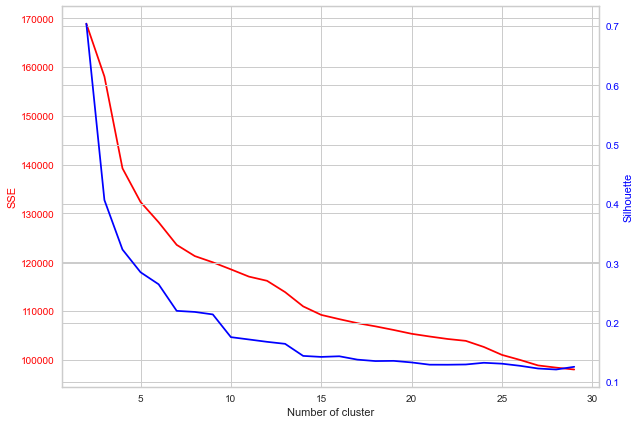

In [13]:
y1=error
y2=sil
a=range(2,30) #Set the parameter with the same number of max_cluster
color1="red"
color2="blue"

fig, ax1 = plt.subplots(figsize=(9,6))

ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('SSE', color=color1)
ax1.plot(a, y1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  
ax2.set_ylabel('Silhouette', color=color2)  
ax2.plot(a, y2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import Normalizer
from pyclustering.cluster.silhouette import silhouette

array=X_train.values
#X_train_norm = Normalizer(norm='l2').fit(array)
#X_train_normalized = X_train_norm.transform(array)

max_clust= 17
amount_initial_centers = 17
sample=array
initial_centers = kmeans_plusplus_initializer(sample, amount_initial_centers).initialize()
error_norm=[]
sil=[]

xmeans_instance = xmeans(sample, initial_centers)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
error_norm.append(xmeans_instance.get_total_wce())
silu = silhouette(sample, clusters).process().get_score()
silu=np.array(silu)
silu=silu.mean()
sil.append(silu)

In [15]:
#distribuzione cluster
for i in range(len(clusters)):
    print(i,  len(clusters[i]))

0 308
1 566
2 396
3 256
4 866
5 595
6 54
7 370
8 517
9 160
10 380
11 141
12 518
13 196
14 333
15 218
16 255
17 624
18 38
19 561


In [16]:
print("SSE",error_norm, "Numero di cluster", len(clusters), "silhouette:", sil )

SSE [103146.81256645349] Numero di cluster 20 silhouette: [0.14458687443888624]


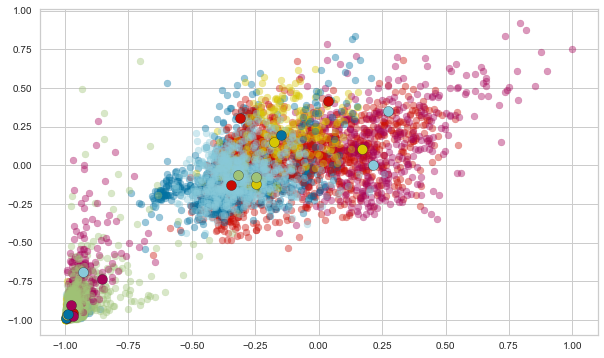

In [17]:
#PLOT CLUSTER
plt.figure(figsize=[10,6])
i=3
j=4
for indexes in clusters:
    plt.scatter(X_train.values[indexes,i], X_train.values[indexes,j], alpha=0.4)
for c in centers:
    plt.scatter(c[i], c[j], s=100, edgecolors='k')

## K_Means

In [18]:
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer


random_seed = 1000
sample=X_train.values
amount_initial_center=range(30)
error=[]
sil=[]

for i in range(2, len(amount_initial_center)):
    
    initial_centers = kmeans_plusplus_initializer(sample, amount_centers=i, random_state=random_seed).initialize()
    kmeans_instance = kmeans(sample, initial_centers)
    kmeans_instance.process()
    clusters = kmeans_instance.get_clusters()
    centers = kmeans_instance.get_centers()
    error.append(kmeans_instance.get_total_wce())
    silu = silhouette(sample, clusters).process().get_score()
    silu=np.array(silu)
    silu=silu.mean()
    sil.append(silu)

In [19]:
for i in range(len(error)):
    print(i, "SSE: ", error[i], "Silhoeutte ", sil[i])

0 SSE:  168898.33921375597 Silhoeutte  0.7037590817406999
1 SSE:  154371.492318424 Silhoeutte  0.5025118070717604
2 SSE:  139251.43717908507 Silhoeutte  0.32294412044595266
3 SSE:  134546.81917028106 Silhoeutte  0.2763620132658843
4 SSE:  127734.29876605008 Silhoeutte  0.24626801297327774
5 SSE:  124675.56767098252 Silhoeutte  0.21809170155494864
6 SSE:  120524.57282869205 Silhoeutte  0.19445462424133667
7 SSE:  118697.54633819053 Silhoeutte  0.1789205115879145
8 SSE:  116572.81622659556 Silhoeutte  0.1866661598695791
9 SSE:  113854.90682177735 Silhoeutte  0.18239824774247854
10 SSE:  112481.05231344115 Silhoeutte  0.15408432002839323
11 SSE:  111339.61123218908 Silhoeutte  0.1568359352799404
12 SSE:  109513.91188026441 Silhoeutte  0.1489784784738835
13 SSE:  108462.69870109833 Silhoeutte  0.13998333737833124
14 SSE:  106594.3002719784 Silhoeutte  0.1467002820078742
15 SSE:  105607.46980771139 Silhoeutte  0.14621354922478944
16 SSE:  104757.58380059221 Silhoeutte  0.1435475223903709
17

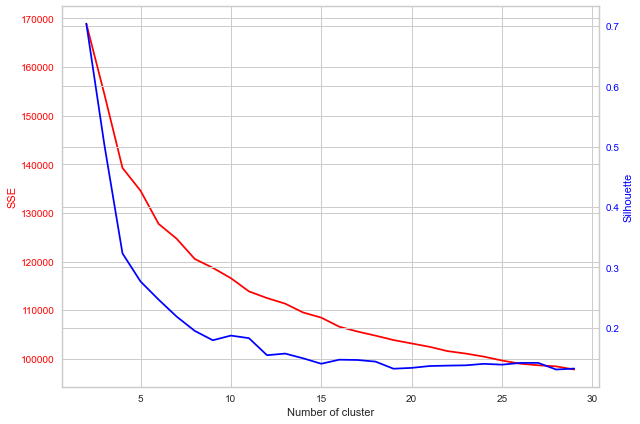

In [20]:
y1=error
y2=sil
a=range(2,30)
color1="red"
color2="blue"

fig, ax1 = plt.subplots(figsize=(9,6))

ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('SSE', color=color1)
ax1.plot(a, y1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  
ax2.set_ylabel('Silhouette', color=color2)  
ax2.plot(a, y2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()
plt.show()

## OPTICS

In [8]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
from sklearn import metrics
#from skelarn.metrics import metrics.silhouette_score

In [45]:
optics = OPTICS(min_samples=(40), max_eps=np.inf)
optics.fit(X_train.values)

OPTICS(min_samples=40)

In [46]:
np.unique(optics.labels_, return_counts=True)

(array([0]), array([7352], dtype=int64))

In [48]:
#silhouette score senza considerare le labels=-1 in quanto sono noise points
sil=silhouette_score(X_train[optics.labels_ != -1], optics.labels_[optics.labels_ != -1])
sil

In [ ]:
#PLOT
for cluster_id in np.unique(optics.labels_)[:20]:
    indexes = np.where(optics.labels_==cluster_id)
    plt.scatter(X_train.values[indexes,i], X_train.values[indexes,j], alpha=0.4)

In [ ]:
#da questo grafico si potrebbe capire dove c'è il salto della reach_dist che probabilmente c'è un cluster.
#più l'altezza dei bin è bassa, più concentrato e denso è il cluster
plt.hist(optics.reachability_[1:])
plt.show()

In [ ]:
optics1 = OPTICS(min_samples=5, max_eps=np.inf, cluster_method='dbscan', eps=0.3)
optics1.fit(X_train)

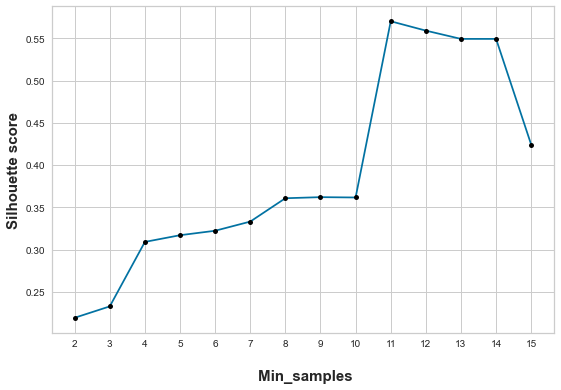

In [47]:
#Cluster method = 'XI', scegliamo il miglior numero di min_samples in base alla silhouette
plt.figure(figsize = (9,6))
min_samples_to_test = [2,3,4,5,6,7,8,9,10,11,12,13,14,15] #massimo 20 perchè poi vede solo noise points
values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

#range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
plt.rcParams['axes.facecolor'] = 'w'
silhouette_avg = []
error =[]
for min_samples in min_samples_to_test:
    optics1 = OPTICS(min_samples=min_samples, max_eps=np.inf, cluster_method='xi')
    optics1.fit(X_train)
    cluster_labels = optics1.labels_
    silhouette_avg.append(silhouette_score(X_train.values[optics1.labels_ != -1], optics1.labels_[optics1.labels_ != -1]))
    
plt.plot(min_samples_to_test, silhouette_avg, marker='.', markersize=10, markerfacecolor='black')
plt.xlabel('\n Min_samples', fontsize = 15, fontweight = 'bold')
plt.ylabel('Silhouette score', fontsize = 15, fontweight = 'bold')
plt.grid(True)
plt.xticks(values)
plt.show()

In [49]:
silhouette_avg

[0.2193610650198574,
 0.23283379786770192,
 0.30909788567345337,
 0.31701992930062184,
 0.3222952456063075,
 0.3331323532677621,
 0.3607621576118461,
 0.3620364089458868,
 0.36164681419951406,
 0.5700875115608836,
 0.5590162670003318,
 0.5492312076986233,
 0.5492312076986233,
 0.4241152557717989]

In [50]:
optics1 = OPTICS(min_samples=11, max_eps=np.inf, cluster_method='xi')
optics1.fit(X_train)

OPTICS(min_samples=11)

In [51]:
np.unique(optics1.labels_, return_counts=True)

(array([-1,  0,  1,  2]), array([7286,   23,   25,   18], dtype=int64))

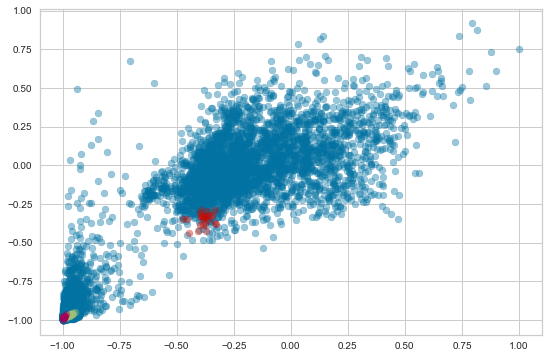

In [52]:
plt.figure(figsize=(9,6))
for cluster_id in np.unique(optics1.labels_)[:20]:
    indexes = np.where(optics1.labels_==cluster_id)
    plt.scatter(X_train.values[indexes,3], X_train.values[indexes,4], alpha=0.4)

# Transactional Clustering

## K-Mode

In [55]:
# !pip install kmodes

In [9]:
#!pip install --user plotnine

In [67]:
from kmodes.kmodes import KModes


In [10]:
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')
# Import module for k-protoype cluster
from kmodes.kmodes import KModes

In [11]:
X_cat = list()
for i in range(len(X_train)):
    X_cat.append(pd.qcut(X_train.values[i], q=[0.0, 0.25, 0.5, 0.75, 1.0], labels=False))
X_cat = np.array(X_cat)

In [12]:
X_cat_test = list()
for i in range(len(X_test)):
    X_cat_test.append(pd.qcut(X_test.values[i], q=[0.0, 0.25, 0.5, 0.75, 1.0], labels=False))
X_cat_test = np.array(X_cat_test)

In [13]:
X_cat_test=pd.DataFrame(data=X_cat_test)

In [14]:
X_cat=pd.DataFrame(data=X_cat)

In [15]:
np.unique(X_cat_test, return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([389046, 389309, 388809, 388852], dtype=int64))

In [34]:
cost = [] #Andiamo a salvare km.cost che rappresenta la somma di tutte le dissimilarità dei cluster. Più basso è, migliore è il Clustering
costo=[]
for cluster in range(2, 15):    
    km = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
    km = km.fit(X_cat)
    costo.append(km.cost_)
    cost=costo[0]
    

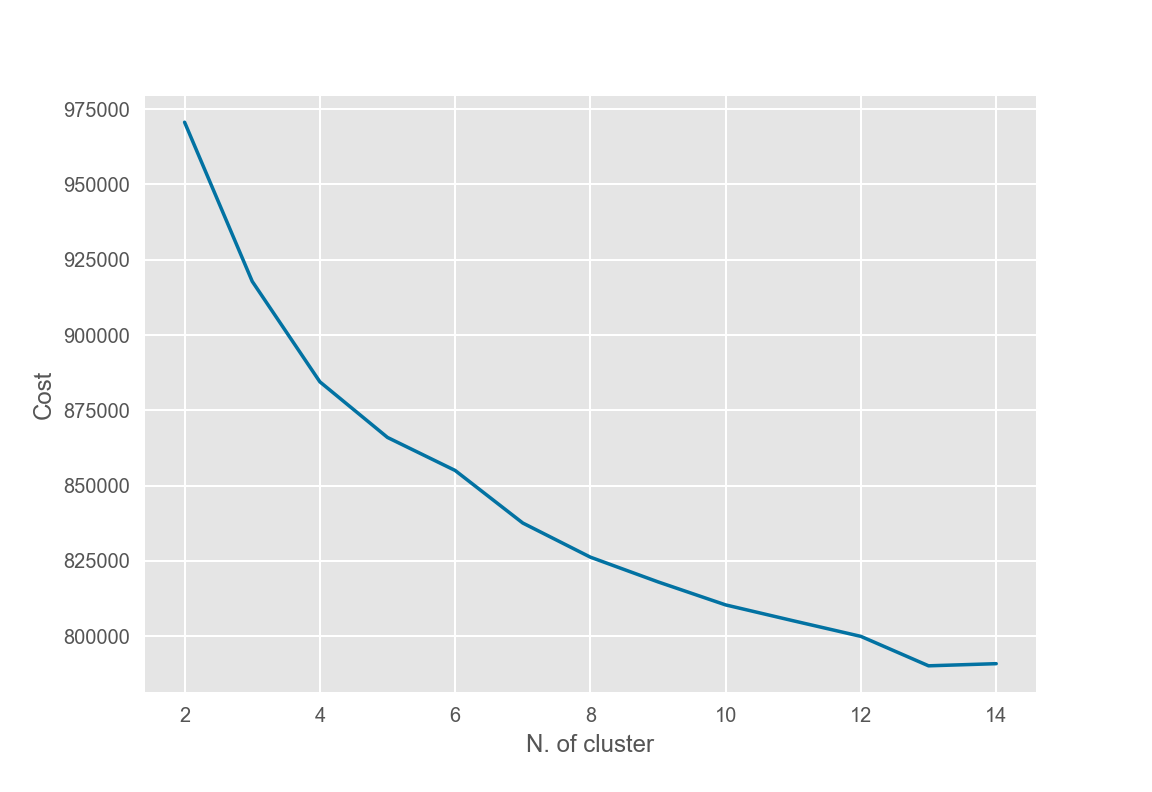

In [38]:
#Elbow Method to find optimal number of cluster
df_cost = pd.DataFrame({'Cluster': range(2, 15), 'Cost': costo})

plt.plot(df_cost["Cluster"], df_cost["Cost"], 'bx-')
plt.xlabel("N. of cluster")
plt.ylabel("Cost")
plt.show()


In [39]:
costo

[970677.0,
 917820.0,
 884455.0,
 865975.0,
 855008.0,
 837552.0,
 826205.0,
 817997.0,
 810348.0,
 805075.0,
 799892.0,
 790119.0,
 790834.0]

In [40]:
km = KModes(n_jobs = -1, n_clusters = 7, init = 'Huang', random_state = 0)
km = km.fit(X_cat)

In [41]:
km.cluster_centroids_

array([[3, 3, 3, ..., 2, 3, 3],
       [3, 3, 3, ..., 2, 3, 3],
       [3, 2, 2, ..., 0, 3, 3],
       ...,
       [3, 3, 2, ..., 1, 3, 3],
       [3, 3, 3, ..., 2, 3, 2],
       [3, 3, 3, ..., 2, 3, 3]], dtype=int64)

In [42]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=uint16),
 array([1212,  877,  932, 1344, 1016, 1100,  871], dtype=int64))

In [43]:
#ditribuzione oggetti cluster con le classi del dataset
pclass_xt = pd.crosstab(km.labels_, y_train[0])
pclass_xt

,1,2,3,4,5,6
row_0,,,,,,
0,0,0,0,453,328,431
1,0,0,0,227,445,205
2,59,73,800,0,0,0
3,995,271,75,0,2,1
4,172,729,111,0,0,4
5,0,0,0,341,266,493
6,0,0,0,265,333,273


## To see characteristics into a single cluster

In [44]:
cluster2=np.where(km.labels_ == 2)
y_train2=y_train.iloc[cluster2][:]
X_cat2=X_cat.iloc[cluster2][:]

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score 
X_cat2_new, X_test2_new, y_train2_new, y_test2_new = train_test_split(X_cat2, y_train2, test_size = 0.33, random_state = 42)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

clf_dt = DecisionTreeClassifier(criterion='gini', max_depth= None, random_state=42)
clf_dt.fit(X_cat2_new, y_train2_new) #df3

DecisionTreeClassifier(random_state=42)

In [47]:
len(X_cat2)

932

In [48]:
y_pred=clf_dt.predict(X_test2_new)
print('Accuracy %s' % accuracy_score(y_test2_new, y_pred))
print('F1-score %s' % f1_score(y_test2_new, y_pred, average=None))
print(classification_report(y_test2_new, y_pred))

Accuracy 0.9415584415584416
F1-score [0.87804878 0.58823529 0.96857671]
              precision    recall  f1-score   support

           1       0.95      0.82      0.88        22
           2       0.59      0.59      0.59        17
           3       0.96      0.97      0.97       269

    accuracy                           0.94       308
   macro avg       0.83      0.79      0.81       308
weighted avg       0.94      0.94      0.94       308



In [49]:
clf_dt.feature_importances_
df=pd.DataFrame({'Features_names': X_train.columns, 'Importances': clf_dt.feature_importances_})
df

,Features_names,Importances
0,tBodyAcc-mean()-X,0.000000
1,tBodyAcc-mean()-Y,0.022581
2,tBodyAcc-mean()-Z,0.000000
3,tBodyAcc-std()-X,0.000000
4,tBodyAcc-std()-Y,0.000000
...,...,...
523,"angle(tBodyGyroMean,gravityMean)",0.000000
524,"angle(tBodyGyroJerkMean,gravityMean)",0.000000
525,"angle(X,gravityMean)",0.145007
526,"angle(Y,gravityMean)",0.000000


In [50]:
df1= df.sort_values(by='Importances', ascending=False)
df2=df1[:6]
df2

,Features_names,Importances
198,tGravityAccMag-std(),0.368347
525,"angle(X,gravityMean)",0.145007
161,tBodyGyroJerk-energy()-X,0.067675
147,"tBodyGyro-correlation()-Y,Z",0.060561
252,fBodyAcc-max()-Y,0.044999
52,tGravityAcc-energy()-Z,0.041166


In [51]:
#1 WALKING #2 WALKING_UPSTAIRS #3 WALKING_DOWNSTAIRS #4 SITTING #5 STANDING #6 LAYING
print(np.unique(X_cat2[198]), np.unique( y_train2[0], return_counts=True))
# si vede che per questa var sono presenti solo valori alti ed in particolare identifica 800 record Walking downstairs

[2 3] (array([1, 2, 3], dtype=int64), array([ 59,  73, 800], dtype=int64))


In [52]:
#in teoria andando a plottare i cluster per la variabile tBodyAccMag-std() discretizzata si dovrebbe vedere che
#effettivamente per un valore alto ovvero 3 si identifica un gruppo di 
pclass_xt2 = pd.crosstab(X_cat2[198], y_train2[0])
pclass_xt2

,1,2,3
198,,,
2,56,54,61
3,3,19,739


## ROCK

In [53]:
#NON usato
from pyclustering.cluster import rock

In [54]:
rc = rock.rock(X_cat[:100], eps=0.7, number_clusters=4, threshold=0.5)
rc.process()

In [55]:
clusters_rc = rc.get_clusters()

In [56]:
clusters_rc

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9, 11, 60, 62, 68, 70, 84, 85],
 [10],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [61],
 [63],
 [64],
 [65],
 [66],
 [67],
 [69],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99]]

In [58]:
for i, indexes in enumerate(clusters_rc):
    print(i, X_cat[indexes[:5]])
    #plt.scatter(X_train.values[indexes,1], X_train.values[indexes,2], alpha=0.4)

0       0
0     3
1     3
2     3
3     3
4     3
...  ..
7347  3
7348  3
7349  3
7350  3
7351  3

[7352 rows x 1 columns]
1       1
0     3
1     3
2     3
3     3
4     3
...  ..
7347  2
7348  3
7349  2
7350  3
7351  3

[7352 rows x 1 columns]
2       2
0     3
1     3
2     3
3     3
4     3
...  ..
7347  2
7348  2
7349  2
7350  2
7351  2

[7352 rows x 1 columns]
3       3
0     1
1     1
2     1
3     1
4     1
...  ..
7347  2
7348  2
7349  2
7350  2
7351  2

[7352 rows x 1 columns]
4       4
0     2
1     2
2     2
3     2
4     2
...  ..
7347  3
7348  3
7349  2
7350  2
7351  3

[7352 rows x 1 columns]
5       5
0     2
1     2
2     2
3     1
4     2
...  ..
7347  3
7348  3
7349  3
7350  3
7351  3

[7352 rows x 1 columns]
6       6
0     2
1     2
2     2
3     2
4     2
...  ..
7347  3
7348  3
7349  3
7350  3
7351  3

[7352 rows x 1 columns]
7       7
0     2
1     2
2     2
3     2
4     2
...  ..
7347  3
7348  3
7349  2
7350  2
7351  2

[7352 rows x 1 columns]
8       8
0     

## Transactional Clustering TX-Means

In [2]:
# https://github.com/riccotti/TX-Means